In [1]:
import torch
import numpy as np
from train_cv import CVTrainer

# Get model & trainer

In [2]:
config = "config.yaml"
trainer = CVTrainer("config.yaml")

CV Network: 4076 parameters
Decoder: 4355 parameters
Feature map: RecenterBondLayer with atoms [1, 2]
Diffusion net loaded from: /Users/shashanksule/Documents/CV_learning/learn/collective_variable/../manifold_learning/outputs/bondalign_23/LAPCAE
Input dim: 12, Encoder dim: 4


# Load training data

In [3]:
dataset = trainer.load_butane_dataset()

Loading butane dataset...
Loaded data shape: (100000, 12)
Applying feature map...
Feature mapped shape: torch.Size([100000, 12])
Applying diffusion net mapping...
Final manifold points shape: torch.Size([100000, 3])
Loaded pretrained surrogate potential from: /Users/shashanksule/Documents/CV_learning/learn/collective_variable/../../butane_AE/feature_map_align_12_carbons/potential_oct8_carbons_01


In [4]:
# conver to loader and get a batch
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1000, shuffle=True)
batch = next(iter(dataloader))


Plot gradients of potential

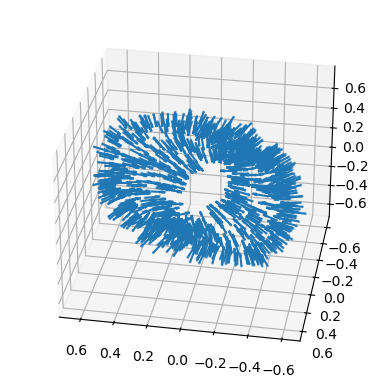

In [5]:
# plot batch
manifold_points = batch[0]
potential_grad = batch[1]
hessian_column = batch[2]

# plot manifold points
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(manifold_points[:, 0], manifold_points[:, 1], manifold_points[:, 2], s=1.0)
ax.quiver(manifold_points[:, 0], manifold_points[:, 1], manifold_points[:, 2], \
        potential_grad[:, 0], potential_grad[:, 1], potential_grad[:, 2], \
            length=0.1)
# plt.colorbar()
ax.view_init(elev=30, azim=100)
plt.show()

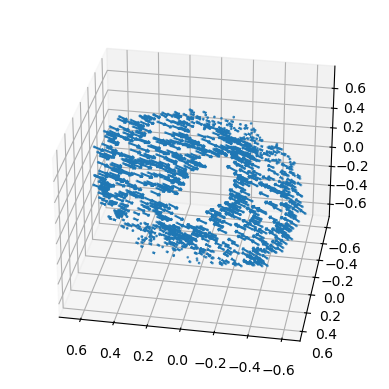

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(manifold_points[:, 0], manifold_points[:, 1], manifold_points[:, 2], s=1.0)
ax.quiver(manifold_points[:, 0], manifold_points[:, 1], manifold_points[:, 2], \
        hessian_column[:, 0], hessian_column[:, 1], hessian_column[:, 2], \
            length=0.1)
# plt.colorbar()
ax.view_init(elev=30, azim=100)

# Training

Starting CV training...
Loading butane dataset...
Loaded data shape: (100000, 12)
Applying feature map...
Feature mapped shape: torch.Size([100000, 12])
Applying diffusion net mapping...
Final manifold points shape: torch.Size([100000, 3])
Loaded pretrained surrogate potential from: /Users/shashanksule/Documents/CV_learning/learn/collective_variable/../../butane_AE/feature_map_align_12_carbons/potential_oct8_carbons_01
Training set: 80000 samples
Validation set: 20000 samples

Epoch 1/1
Batch 0/1250: Loss = 1.705472
Batch 10/1250: Loss = 0.575070
Batch 20/1250: Loss = 0.114049
Batch 30/1250: Loss = 0.149888
Batch 40/1250: Loss = 0.076371
Batch 50/1250: Loss = 0.110085
Batch 60/1250: Loss = 0.082228
Batch 70/1250: Loss = 0.070334
Batch 80/1250: Loss = 0.103548
Batch 90/1250: Loss = 0.058606
Batch 100/1250: Loss = 0.066205
Batch 110/1250: Loss = 0.025737
Batch 120/1250: Loss = 0.053571
Batch 130/1250: Loss = 0.037150
Batch 140/1250: Loss = 0.063873
Batch 150/1250: Loss = 0.078958
Batch 1

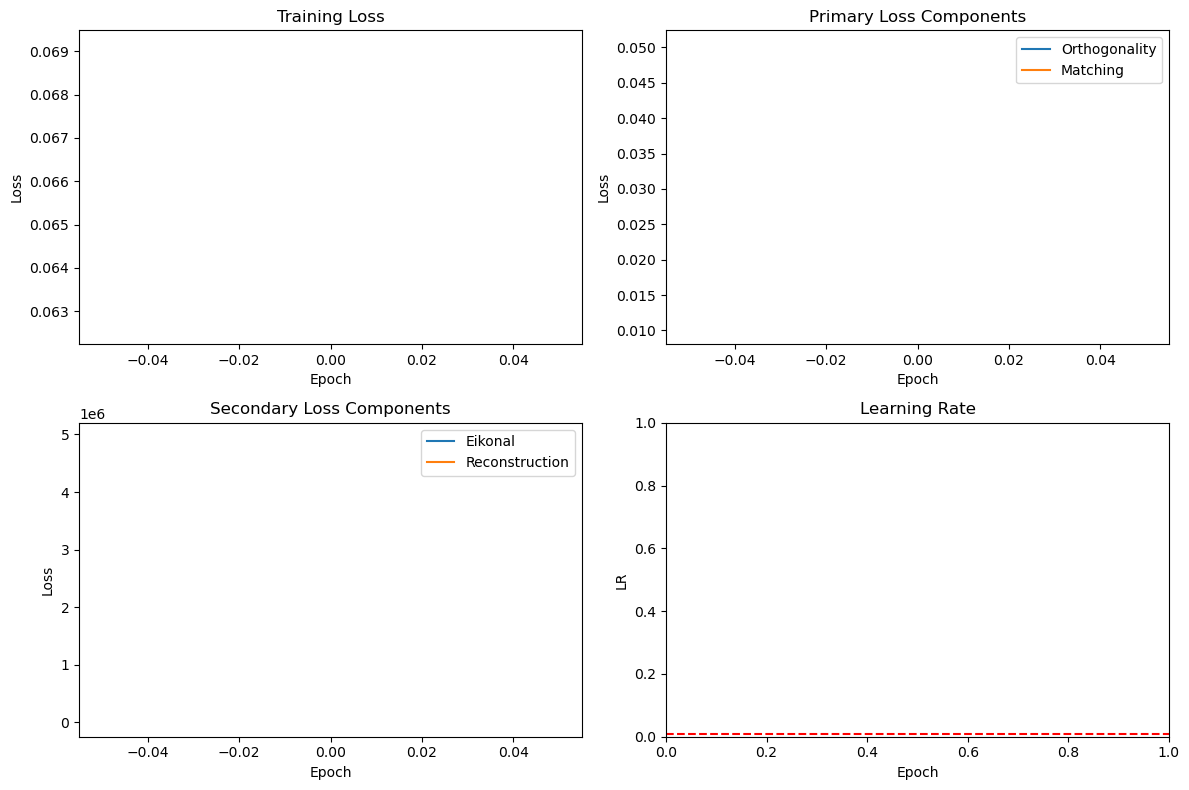

Training curves saved to logs/training_curves.png


In [ ]:
# train!
trainer.train()

# Visualize

In [12]:
mapped_points = trainer.cv_network(manifold_points).detach().cpu().numpy()

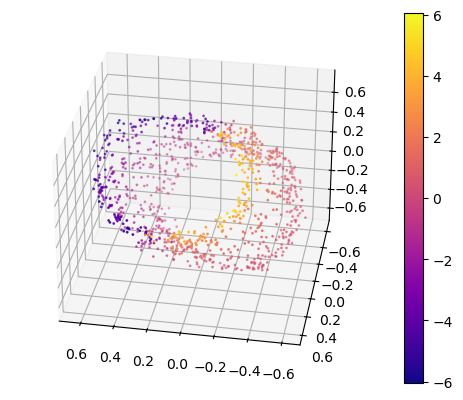

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s=ax.scatter(manifold_points[:, 0], manifold_points[:, 1], manifold_points[:, 2], c=mapped_points, cmap='plasma', s=1.0)
fig.colorbar(s)
ax.view_init(elev=30, azim=100)
plt.show()